In [2]:
#import required libraries/packages

import pandas as pd
import numpy as np




# THEORY

classification  --- fraud no_fraud
90% 10%  ---predict_probability


# f(x)=y=m1x1+m2x2  ==  log (odds) ==y ==log(odds)



# Sigmoid function === converts y into probablity


1/1+(-f(x))

1/1+(-(odds))


Get probabilities:::::::::::::
1/1+(-(p/1-p)))=     1-p  

# like .2  .8


In [3]:
from sklearn.datasets import load_breast_cancer


In [ ]:
dt =load_breast_cancer()

dt


In [5]:
dt.feature_names



array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(dt.data,dt.target, test_size=0.2,random_state=100)  

In [7]:
# import the logistic regressor for CLASSIFICATION

from sklearn.linear_model import LogisticRegression

#REGULARIZATION--- L2 ridge
#L1 --LASSO




classify = LogisticRegression(C=1,random_state=100, max_iter=5000, 
                                 penalty='l1', solver='saga') 

classify

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=100, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
??classify




In [9]:


 
classify.fit(X_train, y_train) #training the algorithm

classify

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=100, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:

#To retrieve the intercept:
print(classify.intercept_)
#For retrieving the slope:
print(classify.coef_)


[0.00295199]
[[ 0.01975652 -0.00567684  0.0948566   0.01345349  0.         -0.00022432
  -0.00076729  0.          0.          0.          0.         -0.00019836
  -0.00260552 -0.03795916  0.          0.          0.          0.
   0.          0.          0.02098527 -0.02424623  0.06937431 -0.02850882
   0.         -0.00221735 -0.00316891 -0.00047541  0.          0.        ]]


In [11]:
dt.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
#train accuracy score
classify.score(X_train,y_train)


#0.9164835164835164

0.9164835164835164

In [13]:
#test accuracy score
classify.score(X_test,y_test)
#0.9473684210526315


0.9473684210526315

In [14]:
y_pred=classify.predict(X_test)

In [15]:
dataset=classify.predict_proba(X_test)



#threshold=.4





In [16]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1])

In [17]:
y_test.shape

(114,)

# CONFUSION MATRIX

In [18]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test,y_pred ))


[[46  3]
 [ 3 62]]


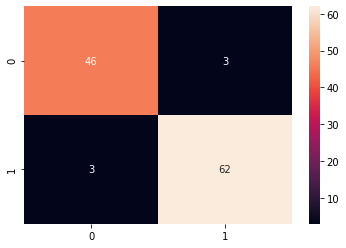

In [19]:

import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_test,y_pred ),annot=True)


In [20]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.95      0.95      0.95        65

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# THEORY 1


sensitivity ==recall
specificity   ==


precision
f1 score


a+b/2

2*a*b/a+b

# THEORY 2

## MISCLAFFICATION RATE


TPR == True Positive rate ==TP/TP+FN == recall  ==sensitivity
FPR == 1 - specificity  == FP/TN+FP

# PRECISION == 
TP/TP+FP  ==20/20+10

# RECALL == 
TP/TP+FN  == TP/actual positives


# f1 score == 2ab/a+b      [this is harmonic mean]
i.e.; 2 precision*recall/precision+recall


In [21]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

#classification_report()

0.9473684210526315

# ROC AUC CURVE

In [22]:
from sklearn import metrics

print("Accuracy:",metrics.roc_curve(y_test, y_pred))


Accuracy: (array([0.        , 0.06122449, 1.        ]), array([0.        , 0.95384615, 1.        ]), array([2, 1, 0]))


# PLOT OF ROC

In [23]:
fpr=[0.        , 0.10204082, 1.        ]
tpr=[0.        , 0.93846154, 1.        ]




#pd.DataFrame(fpr,tpr)

fpr2=[0.        , 0.06122449, 1.        ]
tpr2=[0.        , 0.95384615, 1.        ]

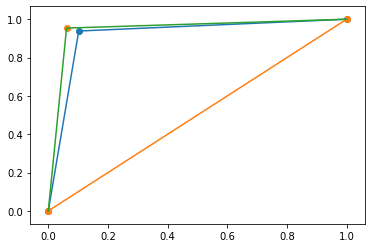

In [24]:


import matplotlib.pyplot as plt

plt.scatter(fpr,tpr)
plt.plot(fpr,tpr)

plt.plot([0,1],[0,1])


plt.scatter(fpr2,tpr2)

plt.plot(fpr2,tpr2)
plt.show()



#sns.lmplot(fpr,tpr)